In [264]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder 
from sklearn.cluster import KMeans  
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score  
import seaborn as sns
import numpy as np


<center>importation des donnéés</center>

In [265]:
dataset = pd.read_csv("Wholesale customers data.csv")

In [266]:
dataset.head(5)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [267]:
dataset.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

Il n'y a aucune valeur manquante dans les données d'apres la ligne de code precedente

<center>Utilisons le oneHotEncoding sur les données CHANNEL et REGION</center>

In [268]:
oneHotEncoder = OneHotEncoder()  

dataset["Channel"] = oneHotEncoder.fit_transform(dataset.loc[:, ["Channel"]]).toarray()


dataset["Region"] = oneHotEncoder.fit_transform(dataset.loc[:, ["Region"]]).toarray()

dataset.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.0,0.0,12669,9656,7561,214,2674,1338
1,0.0,0.0,7057,9810,9568,1762,3293,1776
2,0.0,0.0,6353,8808,7684,2405,3516,7844
3,1.0,0.0,13265,1196,4221,6404,507,1788
4,0.0,0.0,22615,5410,7198,3915,1777,5185


In [269]:
X_dataset = dataset.values
X_dataset

array([[0.0000e+00, 0.0000e+00, 1.2669e+04, ..., 2.1400e+02, 2.6740e+03,
        1.3380e+03],
       [0.0000e+00, 0.0000e+00, 7.0570e+03, ..., 1.7620e+03, 3.2930e+03,
        1.7760e+03],
       [0.0000e+00, 0.0000e+00, 6.3530e+03, ..., 2.4050e+03, 3.5160e+03,
        7.8440e+03],
       ...,
       [0.0000e+00, 0.0000e+00, 1.4531e+04, ..., 4.3700e+02, 1.4841e+04,
        1.8670e+03],
       [1.0000e+00, 0.0000e+00, 1.0290e+04, ..., 1.0380e+03, 1.6800e+02,
        2.1250e+03],
       [1.0000e+00, 0.0000e+00, 2.7870e+03, ..., 6.5000e+01, 4.7700e+02,
        5.2000e+01]])

In [270]:
X_dataset_1 = dataset.iloc[:, 1:]
y_dataset_1 = dataset.iloc[:, 0]

X_dataset_1

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.0,12669,9656,7561,214,2674,1338
1,0.0,7057,9810,9568,1762,3293,1776
2,0.0,6353,8808,7684,2405,3516,7844
3,0.0,13265,1196,4221,6404,507,1788
4,0.0,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...
435,0.0,29703,12051,16027,13135,182,2204
436,0.0,39228,1431,764,4510,93,2346
437,0.0,14531,15488,30243,437,14841,1867
438,0.0,10290,1981,2232,1038,168,2125


<center>Appliquons kmeans et visualisons les resultats</center>

In [ ]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_dataset)

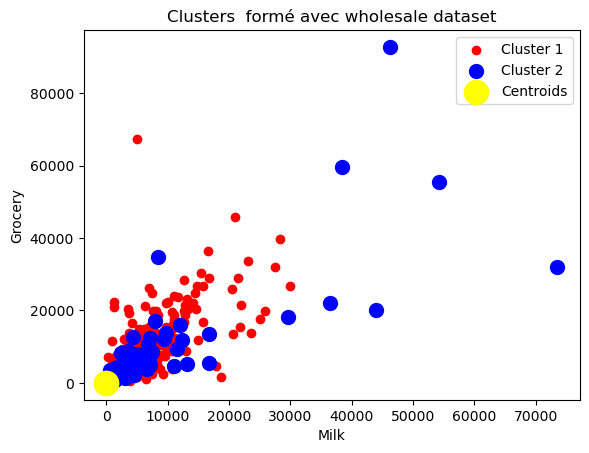

In [272]:
plt.scatter(X_dataset[y_kmeans == 0, 3], X_dataset[y_kmeans == 0, 4], c = 'red', label = 'Cluster 1')
plt.scatter(X_dataset[y_kmeans == 1, 3], X_dataset[y_kmeans == 1, 4], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters  formé avec wholesale dataset')
plt.xlabel('Milk')
plt.ylabel('Grocery')
plt.legend()
plt.show()

<center>Utilisons DBSCAN  sur les données</center>

In [273]:
est_dbscan = DBSCAN(eps=0.1, min_samples=5)
pred_dbscan = est_dbscan.fit_predict(X_dataset)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


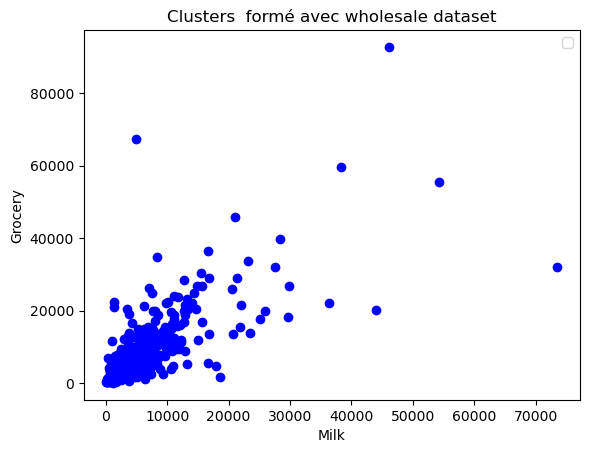

In [274]:
plt.scatter(dataset.iloc[:,3], dataset.iloc[:,4], c = 'blue')
plt.title('Clusters  formé avec wholesale dataset')
plt.xlabel('Milk')
plt.ylabel('Grocery')
plt.legend()
plt.show()

<center>Calculer le silhouette score, le davies-bouldin score. Et comparer les deux résultats.</center>

In [275]:
labels = kmeans.labels_
kmaens_silhouette = silhouette_score(X_dataset, labels)

kmeans_bound_score = davies_bouldin_score(X_dataset, labels)  

print(f"La sihouette est de :{kmaens_silhouette} \nLe David_bound_score est de: {kmeans_bound_score }")

La sihouette est de :0.511533389262582 
Le David_bound_score est de: 1.1293064860010278


In [277]:
from sklearn.model_selection import train_test_split

x = X_dataset_1.values 
y = y_dataset_1.values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)#random_state=0 pour toujours obtenir le meme resultat
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(352, 7) (88, 7) (352,) (88,)


In [278]:
from sklearn.metrics import accuracy_score

In [279]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB 
model = GaussianNB()
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(pred)

[1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1.
 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1.
 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1.]


In [280]:
result = accuracy_score(y_test,pred)
print("Accuracy:",result)

Accuracy: 0.9318181818181818
